# **3.Classify restaurants into high-rated (≥ 3.5) and low-rated (< 3.5) categories using a Decision Tree model based on votes, cost, online order, and table booking.**

Accuracy: 0.8513135228251507

Confusion Matrix:
 [[2082  639]
 [ 742 5825]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75      2721
           1       0.90      0.89      0.89      6567

    accuracy                           0.85      9288
   macro avg       0.82      0.83      0.82      9288
weighted avg       0.85      0.85      0.85      9288



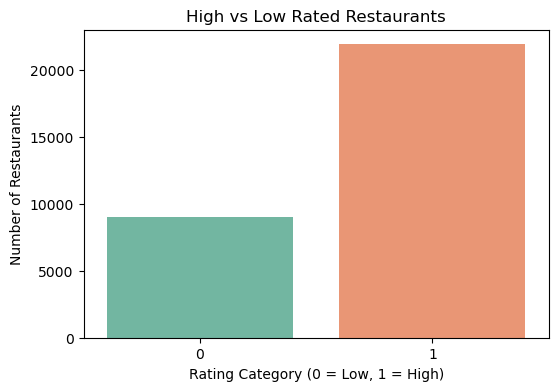

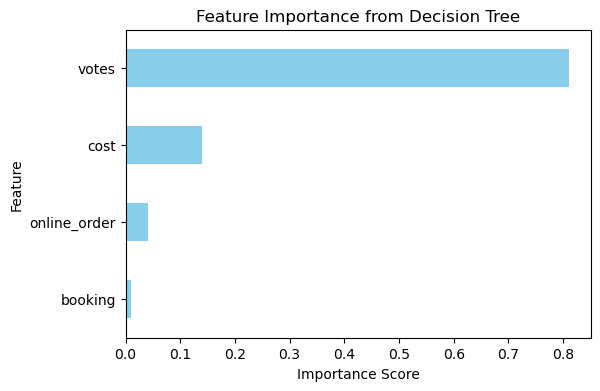

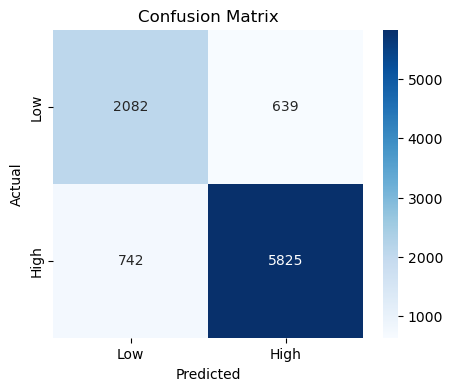

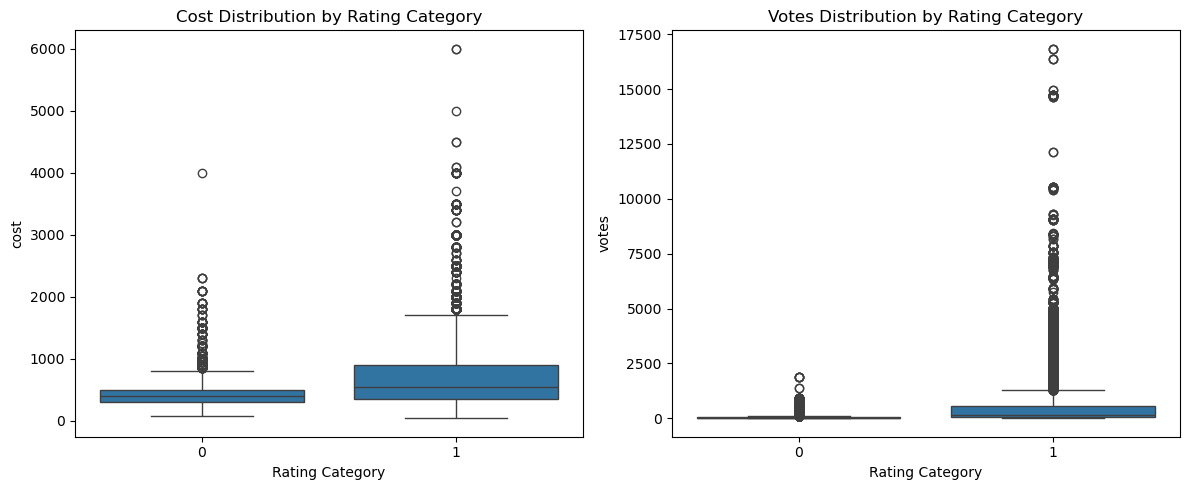

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

df = pd.read_csv("C:\\Projects\\DataAnalysisProjects\\ZomatoRestaurantDataAnalysis\\CleanedData\\cleaned_data.csv")

df['online_order']=df['online_order'].map({'Yes':1, 'No':0})
df['booking'] = df['booking'].map({'Yes': 1, 'No': 0})
df['rating_category']=df['rating'].apply(lambda x: 1 if x>=3.5 else 0)

X=df[['votes','cost','online_order','booking']].copy()
y=df['rating_category']

scaler=StandardScaler()
X[['votes','cost']]=scaler.fit_transform(X[['votes','cost']])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

plt.figure(figsize=(6,4))
sns.countplot(x='rating_category', data=df, hue='rating_category', palette='Set2', legend=False)
plt.title("High vs Low Rated Restaurants")
plt.xlabel("Rating Category (0 = Low, 1 = High)")
plt.ylabel("Number of Restaurants")
plt.savefig("C:\\Projects\\DataAnalysisProjects\\ZomatoRestaurantDataAnalysis\\Visualizations\\restaurants_success5.png", dpi=300, bbox_inches='tight')
plt.show()

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(6,4))
feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance from Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.savefig("C:\\Projects\\DataAnalysisProjects\\ZomatoRestaurantDataAnalysis\\Visualizations\\restaurants_success4.png", dpi=300, bbox_inches='tight')
plt.show()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("C:\\Projects\\DataAnalysisProjects\\ZomatoRestaurantDataAnalysis\\Visualizations\\restaurants_success2.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x='rating_category', y='cost', data=df)
plt.title("Cost Distribution by Rating Category")
plt.xlabel("Rating Category")

plt.subplot(1,2,2)
sns.boxplot(x='rating_category', y='votes', data=df)
plt.title("Votes Distribution by Rating Category")
plt.savefig("C:\\Projects\\DataAnalysisProjects\\ZomatoRestaurantDataAnalysis\\Visualizations\\restaurants_success3.png", dpi=300, bbox_inches='tight')
plt.xlabel("Rating Category")

plt.tight_layout()
plt.savefig("C:\\Projects\\DataAnalysisProjects\\ZomatoRestaurantDataAnalysis\\Visualizations\\restaurants_classifier.png", dpi=300, bbox_inches='tight')
plt.show()

## Model Evaluation Report: Restaurant Rating Classification

### 🔍 Objective:
Classify restaurants into **high-rated (rating ≥ 3.5)** and **low-rated (rating < 3.5)** using Decision Tree Classifier.

---

### 📊 Confusion Matrix:

|                  | Predicted Low (0) | Predicted High (1) |
|------------------|------------------|--------------------|
| Actual Low (0)   | 2082             | 639                |
| Actual High (1)  | 742              | 5825               |

---

### 📈 Classification Report:

- **Accuracy**: `85.13%`
- **Precision (Low Rating)**: 0.74
- **Recall (Low Rating)**: 0.77
- **F1-Score (Low Rating)**: 0.75

- **Precision (High Rating)**: 0.90
- **Recall (High Rating)**: 0.89
- **F1-Score (High Rating)**: 0.89

---

### 🧠 Insights:

- ✅ **2082 restaurants** are **actually low-rated** and correctly predicted as low-rated (**True Negatives**).
- ❌ **639 restaurants** are **actually low-rated**, but **misclassified** as high-rated (**False Positives**).
- ❌ **742 restaurants** are **actually high-rated**, but predicted as low-rated (**False Negatives**).
- ✅ **5825 restaurants** are **actually high-rated** and correctly predicted as high-rated (**True Positives**).

---

### 📝 Conclusion:

- The model performs **very well in identifying high-rated restaurants** with high precision and recall.
- There is room for improvement in detecting **low-rated restaurants**, where precision and recall are relatively lower.
- Overall, the **accuracy of 85%** shows the model is performing reliably for the classification task.
5      9288
